## Social networks: identifying important nodes 

In [1]:
#Loading relevant libraries

!pip install python-louvain
from community import community_louvain
import networkx as nx
import community
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
from igraph import *
np.random.seed(0)
import pandas as pd
import matplotlib.cm as cm
import networkx.algorithms.community as nx_comm





import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import igraph as ig
from igraph import *
import networkx.algorithms.community as nx_comm


In [2]:
np.random.seed(123)
#Erdos renyi network: Model: G(n,p)
#n=34, p=sum of degrees/(n(n-1))
#n=34;p=78*2/(n*(n-1))
#K= nx.erdos_renyi_graph(n,p)
#nx.draw(K, with_labels=True)
#plt.show()

In [3]:
#Loading network
#K = nx.karate_club_graph()
K=nx.read_weighted_edgelist('Karate.txt')
#K=nx.read_weighted_edgelist('Dolphins.txt')
#K=nx.read_weighted_edgelist('FIFA.txt')
#K=nx.read_weighted_edgelist('Centrality.txt')
#K=nx.read_weighted_edgelist('Mali.txt')
#K=nx.read_weighted_edgelist('PIN_Malaria.txt')
#K=nx.read_weighted_edgelist('openflights.txt')
#K=nx.read_weighted_edgelist('power.txt')
#K=nx.read_weighted_edgelist('Canton.txt')
#K=nx.read_weighted_edgelist('Enz_g355.txt')

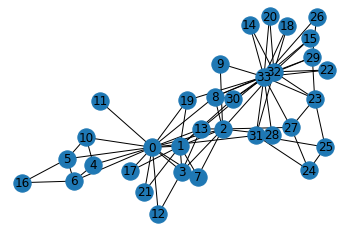

In [4]:
#Ploting network
#plt.clf()
nx.draw_networkx(K)
plt.axis('off')
#plt.savefig('Network1.png')
plt.show()
A_K=nx.to_numpy_matrix(K)

In [5]:
print(A_K)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


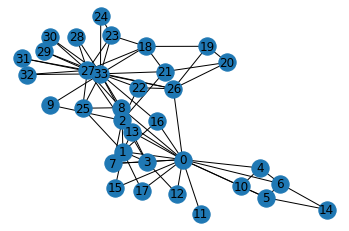

[[16.  9. 10.  6.  3.  4.  4.  4.  5.  2.  3.  1.  2.  5.  2.  2.  3.  2.
   5.  3.  3.  4.  3.  4.  2.  4.  6. 12.  2.  2.  2.  2.  2. 17.]]


In [6]:
#Redraw network graph to order node labelling in adjacency matrix.
K2 = nx.from_numpy_matrix(A_K)
plt.clf()
pos = nx.spring_layout(K2)
nx.draw_networkx(K2)

plt.axis('off')
#plt.savefig("pth2.png")
plt.show()
#Define some vector quantities
n = len(A_K)
e = np.ones(n)
k = np.array(np.dot(A_K,e))
print(k)


In [7]:
#Computing Min and Max degree in the network
k = np.dot(A_K,e)
a=k.tolist()
print('Min.Degree=',min(a[0]))
print('Max.Degree:',max(a[0]))
print('Average.Degree=',np.average(a[0]))

Min.Degree= 1.0
Max.Degree: 17.0
Average.Degree= 4.588235294117647


In [8]:
#Network density
nx.density(K2)

0.13903743315508021

In [9]:
print(nx.average_clustering(K2))

0.5706384782076824


In [10]:
print(nx.center(K2))

[0, 1, 2, 3, 8, 13, 16, 26]


In [11]:
#Network summary
print(nx.info(K))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


Text(0.5, 1.0, 'Karate network degree distribution')

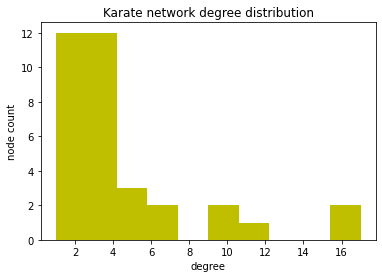

In [12]:
#Degree distribution
plt.hist(a, color='y')
plt.xlabel('degree')
plt.ylabel('node count')
plt.title('Karate network degree distribution')
#plt.savefig("Karate.png")

Text(0.5, 1.0, 'Karate network degree distribution')

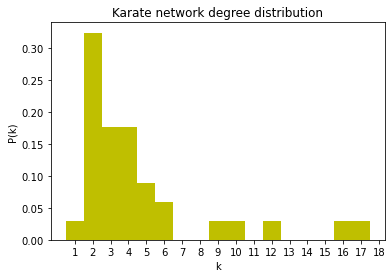

In [13]:
from networkx.generators.random_graphs import binomial_graph
from networkx.generators.degree_seq import expected_degree_graph

fig=plt.figure()
degrees = np.array([K.degree(n) for n in K.nodes()])#Computing degrees of nodes
bins_val=np.arange(np.amin(degrees),np.amax(degrees)+2) #Bins

prob_deg=plt.hist(degrees,bins=bins_val,align='left',weights=np.ones_like(degrees)/len(degrees),
                      color='y')#Histogram
deg=prob_deg[1][:-1]
prob_deg=prob_deg[0]

plt.xticks(bins_val)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Karate network degree distribution')

#plt.show()
#plt.savefig("Karate1.png")

In [14]:
pk=[p for p in prob_deg if p!=0]
pk

[0.029411764705882353,
 0.3235294117647059,
 0.1764705882352941,
 0.17647058823529416,
 0.08823529411764708,
 0.05882352941176472,
 0.02941176470588236,
 0.02941176470588236,
 0.02941176470588236,
 0.02941176470588236,
 0.02941176470588225]

In [15]:
np.average(pk)

0.09090909090909091

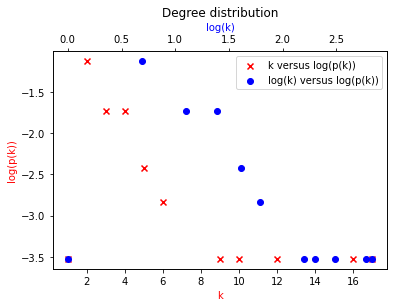

k versus log(p(k)): C = -0.10873556423048092 , alpha = -1.979479011882215
log(k) versus log(p(k)): C = -0.5512494642283116 , alpha = -1.8590424427076029


In [16]:
log_pk = []# log(p(k))
log_k = [] # log(k)
k=[]
#computing log of degree probability (p(k))
for i in range(len(prob_deg)):
    if prob_deg[i]!=0: #dividing by zero results to an error, this drop zeros
        log_pk.append(np.log(prob_deg[i]))
        log_k.append(np.log(deg[i]))
        k.append(deg[i])


# separate figure object and axes object from the plotting object
fig, ax1 = plt.subplots()

# twining x-axis on y-axis
ax2 = ax1.twiny()

# ploting the curves on axis 1&2, and getting the axes handles
#plt.plot(k, log_pk, 'o')
C, alpha = np.polyfit(k, log_pk, 1) #this compute parameters in fitted polynomial
#y=[C-alpha*j for j in k]#for equation of the plynomial
#plt.plot(log_k, y)
curve1 = ax1.scatter(k, log_pk,label="k versus log(p(k))", color='r', marker='x')

curve2 = ax2.scatter(log_k, log_pk, label="log(k) versus log(p(k))", color='b')
C1, alpha1 = np.polyfit(log_k, log_pk, 1)#this also compute parameters in second fitted polynomial
#y1=[C-alpha1*j for j in log_k] #for equation of the polynomial
#plt.plot(log_k, y1)

#adding legends
curves =[curve1, curve2]
ax1.legend(curves, [curve.get_label() for curve in curves])

# Adding x-axes labels
ax1.set_xlabel("k", color='r')
ax2.set_xlabel("log(k)", color='b')

# Adding y-axis label
ax1.set_ylabel("log(p(k))", color='r')


# Plot tittle
plt.title("Degree distribution")
#plt.savefig('Karate_0')
plt.show()
print('k versus log(p(k)): C =',C,', alpha =', alpha)
print('log(k) versus log(p(k)): C =',C1,', alpha =', alpha1)





#Ref: https://stackoverflow.com/questions/16489655/plotting-log-binned-network-degree-distributions

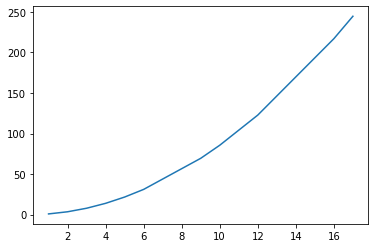

In [17]:
#ploting power and power-law distribution
#parameters for powerlaw-computed from polynomial fit above: pk=ck^a
c=np.exp(C)
a=alpha
pk=[c*k[i]**(-a) for i in range(len(k))]
plt.plot(k,pk)

#computing parameters for exponential distribution:pk=cexp(ak)



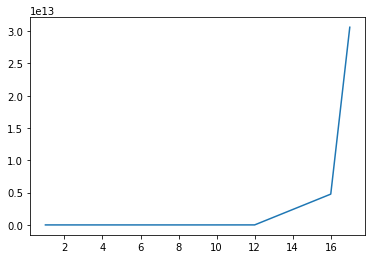

In [18]:
#Exponetial distribution: pk=cexp(-ak)
c1=np.exp(C1)
a1=alpha1
pk1=[c1*np.exp((k[i])*-a1) for i in range(len(k))]
plt.plot(k, pk1)

In [19]:
#Pk=Ce^-ak (Powelaw), Pk=Ck^-a

In [20]:

G = ig.Graph()
G.add_vertices(K2.number_of_nodes())
G.add_edges([(e[0],e[1]) for e in K2.edges()])
print(G)


IGRAPH U--- 34 78 --
+ edges:
 0 --  1  2  3  4  5  6  7  8 10 11 12 13 15 16 17 26      25 --  1  8 27 33
 1 --  0  2  3  7 13 15 16 17 25                           26 --  0 19 20 22
27 33
 2 --  0  1  3  7  8  9 13 21 22 27                        27 --  2  8 18 23
25 26 28 29 30 31 32 33
 3 --  0  1  2  7 12 13                                    28 -- 27 33
 4 --  0  6 10                                             29 -- 27 33
 5 --  0  6 10 14                                          30 -- 27 33
 6 --  0  4  5 14                                          31 -- 27 33
 7 --  0  1  2  3                                          32 -- 27 33
 8 --  0  2 25 27 33                                       33 --  8  9 13 16
18 21 22 23 24 25 26 27 28 29 30 31 32
 9 --  2 33
10 --  0  4  5
11 --  0
12 --  0  3
13 --  0  1  2  3 33
14 --  5  6
15 --  0  1
16 --  0  1 33
17 --  0  1
18 -- 19 21 23 27 33
19 -- 18 20 26
20 -- 19 21 26
21 --  2 18 20 33
22 --  2 26 33
23 -- 18 24 27 33
24 -- 23 33


In [21]:
#Degree centrality in network
deg_centrality = nx.degree_centrality(K2)
  
#print(deg_centrality)

In [22]:
#Creating a dataframe of degree centrality
DC_node=[]
DC=[]
for i in range (len(deg_centrality)):
    DC.append(deg_centrality[i])
    DC_node.append(i)
Data1=pd.DataFrame(list(zip(DC_node, DC)),
               columns =['Node_Label', 'DC'])
#Data1


In [23]:
# Closeness Centralit
close_centrality = nx.closeness_centrality(K2)
  
#print(close_centrality)

In [24]:
#Creating a dataframe of closeness centrality
CC_node=[]
CC=[]
for i in range (len(close_centrality)):
    CC.append(close_centrality[i])
    CC_node.append(i)
Data2=pd.DataFrame(list(zip(CC_node, CC)),
               columns =['Node_Label', 'CC'])
#Data2

In [25]:
#Betweeness Centrality
bet_centrality = nx.betweenness_centrality(K2, normalized = True, 
                                              endpoints = False)
  
#print(bet_centrality)

In [26]:
#Creating a dataframe of closeness centrality
BC_node=[]
BC=[]
for i in range (len(bet_centrality)):
    BC.append(bet_centrality[i])
    BC_node.append(i)
Data3=pd.DataFrame(list(zip(BC_node, BC)),
               columns =['Node_Label', 'BC'])
#Data3

In [27]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(K2)

#print(eigenvector_centrality)

In [28]:
#Creating a dataframe of closeness centrality
EC_node=[]
EC=[]
for i in range (len(eigenvector_centrality)):
    EC.append(eigenvector_centrality[i])
    EC_node.append(i)
Data4=pd.DataFrame(list(zip(EC_node, EC)),
               columns =['Node_Label', 'EC'])
#Data4

In [29]:
#Merging dataframe of all centrality measures
C_measures1 = pd.merge(Data1, Data2)

C_measures2 = pd.merge(C_measures1, Data3)

C_measures = pd.merge(C_measures2, Data4)

#C_measures


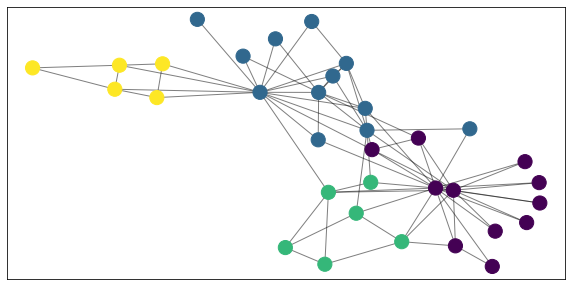

In [30]:
#Ploting the communities of the network

np.random.seed(3)
#Partition as dictionary
communities =community_louvain.best_partition(K2)

shapes = 'so^>v<dph8'

plt.figure(figsize=(10,5))

#Visualizing partition

pos = nx.spring_layout(K2)
cmap = cm.get_cmap('viridis', max(communities.values())+1)

nx.draw_networkx_nodes(K2, pos, communities.keys(),
                      node_size=200, cmap=cmap, node_color=list(communities.values()))
nx.draw_networkx_edges(K2, pos, alpha=0.5)

#plt.show()

#plt.savefig("Karate-com.png")

In [31]:
#print(communities)

In [32]:
#Partition network into communities by the Louvain Algorithm
np.random.seed(3)

partition=community_louvain.best_partition(K2)
communities = set(partition.values())

com_dict={}

for c in communities:
    
    nod=[]
    for k , v in partition.items():
        
        if v==c:
            nod.append(k)
            dic={c:nod}
    
    com_dict.update(dic)


#Creating dataframe of hub-dominance score
node_label=[]
community1=[]
HD_score=[]
for k , v in com_dict.items():
    community1=[]
    for i in v:
        node_label.append(i)
        community1.append(G.degree(i))
        HD_score.append(G.degree(i)/(len(v)-1))
        #print(v)
    print(community1)

#Creating a dataframe of hub-dominance score
data=pd.DataFrame(list(zip(node_label, HD_score)),
               columns =['Node_Label', 'HD_score'])
#data     

[5, 4, 2, 4, 12, 2, 2, 2, 2, 2, 17]
[16, 9, 10, 6, 4, 2, 1, 2, 5, 2, 3, 2]
[5, 3, 3, 4, 3, 6]
[3, 4, 4, 3, 2]


In [33]:
#Computing  number of weak and strong communities

np.random.seed(3)
print('community','  ','Inter-community', ' ', 'Intra-community', '  ', 'Strong/Weak Community','\n')
for c in communities:
    com=[]
    com.append(c)
    nod=[]
    for k , v in partition.items():
        
        if v==c:
            nod.append(k)
            
    sum_inter=[]
    sum_intra=[]
    for p in nod:
        
        x=list(K2.neighbors(p))
        
        interLink=[]
        intraLink=[]
        for y in x:
            if y  in nod:
                interLink.append(y)
            else:
                intraLink.append(y)
            inter=len(interLink)
            
            intra=len(intraLink)
            
        sum_inter.append(inter)
        sum_intra.append(intra)
        if sum(sum_inter)/2>sum(sum_intra):
            w_s_com='Strong comunity'
        else:
            w_s_com='Weak community'
    
    print(c, '             ', sum(sum_inter)/2, '             ', sum(sum_intra),'          ', w_s_com,'\n')
    
    


community    Inter-community   Intra-community    Strong/Weak Community 

0               20.0               14            Strong comunity 

1               24.0               14            Strong comunity 

2               7.0               10            Weak community 

3               6.0               4            Strong comunity 



In [34]:
#Number of communities
len(communities)

4

In [35]:
#computing network modularity
mod = community.modularity(partition ,K2)
mod

0.4188034188034188

In [36]:
#Merging dataframe of centrality measures and hub-dominance score
y=pd.merge(C_measures, data)
y

,Node_Label,DC,CC,BC,EC,HD_score
0,0,0.484848,0.568966,0.437635,0.355483,1.454545
1,1,0.272727,0.485294,0.053937,0.265954,0.818182
2,2,0.303030,0.559322,0.143657,0.317189,0.909091
3,3,0.181818,0.464789,0.011909,0.211174,0.545455
4,4,0.090909,0.379310,0.000631,0.075966,0.750000
5,5,0.121212,0.383721,0.029987,0.079481,1.000000
6,6,0.121212,0.383721,0.029987,0.079481,1.000000
7,7,0.121212,0.440000,0.000000,0.170955,0.363636
8,8,0.151515,0.515625,0.055927,0.227405,0.500000
9,9,0.060606,0.434211,0.000848,0.102675,0.181818


In [37]:
y.describe()

,Node_Label,DC,CC,BC,EC,HD_score
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,16.500000,0.139037,0.426480,0.044006,0.146411,0.583422
std,9.958246,0.117509,0.072092,0.093935,0.090649,0.410647
min,0.000000,0.030303,0.284483,0.000000,0.023635,0.090909
25%,8.250000,0.060606,0.371840,0.000000,0.080673,0.200000
50%,16.500000,0.090909,0.383721,0.002566,0.102041,0.500000
75%,24.750000,0.151515,0.480168,0.031853,0.186967,0.813636
max,33.000000,0.515152,0.568966,0.437635,0.373371,1.700000


In [38]:
#sorting data by HD-score
(y.sort_values(by="HD_score", ascending=False)).head(10)

,Node_Label,DC,CC,BC,EC,HD_score
33,33,0.515152,0.550000,0.304075,0.373371,1.700000
0,0,0.484848,0.568966,0.437635,0.355483,1.454545
26,26,0.181818,0.540984,0.138276,0.191036,1.200000
27,27,0.363636,0.515625,0.145247,0.308651,1.200000
18,18,0.151515,0.392857,0.017614,0.150123,1.000000
5,5,0.121212,0.383721,0.029987,0.079481,1.000000
6,6,0.121212,0.383721,0.029987,0.079481,1.000000
2,2,0.303030,0.559322,0.143657,0.317189,0.909091
1,1,0.272727,0.485294,0.053937,0.265954,0.818182
21,21,0.121212,0.458333,0.022333,0.133479,0.800000


In [39]:
y.drop(y.columns[0],axis=1, inplace=True)


In [40]:
#Correlation matrix of centrality measures and HD-score
y.corr().style.background_gradient(cmap="Blues_r")


,DC,CC,BC,EC,HD_score
DC,1.000000,0.771591,0.914643,0.917255,0.833060
CC,0.771591,1.000000,0.717945,0.904615,0.587463
BC,0.914643,0.717945,1.000000,0.803213,0.760347
EC,0.917255,0.904615,0.803213,1.000000,0.643338
HD_score,0.833060,0.587463,0.760347,0.643338,1.000000
